Ways to handle missing data:
1) Remove them (not preferable as the entire row is removed)
2) Impute them (fill some values of your own)

Two ways of imputing:
1) Univariate
2) Multivariate

Removing missing values is called CCA (Complete Case Analysis)

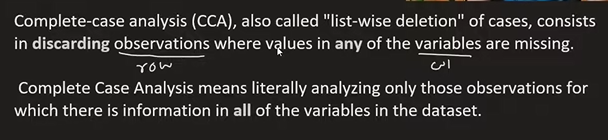

Assumptions for CCA:
1) Your data is missing completely at random. This is because we want to maintain the distribution

MCAR=Missing Completely At Random

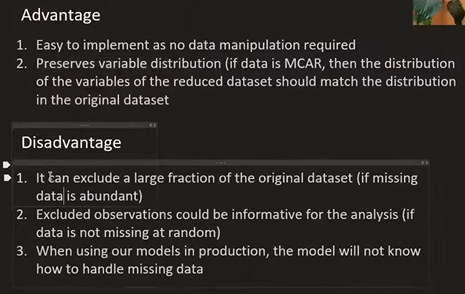

You do not apply CCA when the column has more than 5% of missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science_job.csv')

In [3]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
18494,13308,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,11.0,1000-4999,Pvt Ltd,25.0,1.0
13956,5725,city_9,0.743,Female,Has relevent experience,no_enrollment,Masters,STEM,7.0,50-99,Pvt Ltd,222.0,0.0
11909,19643,city_90,0.698,Male,Has relevent experience,Part time course,High School,NaN,6.0,NaN,NaN,58.0,1.0
18613,31314,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,2.0,<10,Early Stage Startup,81.0,0.0
10835,6781,city_150,0.698,NaN,Has relevent experience,no_enrollment,Graduate,STEM,20.0,5000-9999,Public Sector,10.0,0.0


In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
# to get the amount of missing
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

So, we can't apply CCA on gender, major_discipline, etc.

In [ ]:
# get the columns with less than 5% missing data
cols=[]
for col in df.columns:
    if(df[col].isnull().mean()<0.05 and df[col].isnull().mean()>0):
        cols.append(col)

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
2142,0.766,no_enrollment,Graduate,6.0,33.0
12891,0.624,no_enrollment,Graduate,5.0,188.0
14123,0.884,NaN,High School,11.0,232.0
14939,0.920,no_enrollment,Graduate,20.0,99.0
12359,0.897,no_enrollment,Primary School,4.0,26.0


In [10]:
# to find how much dropping the data will affect us
(len(df[cols].dropna())/len(df))*100

89.68577095730244

In [11]:
new_df=df[cols].dropna()

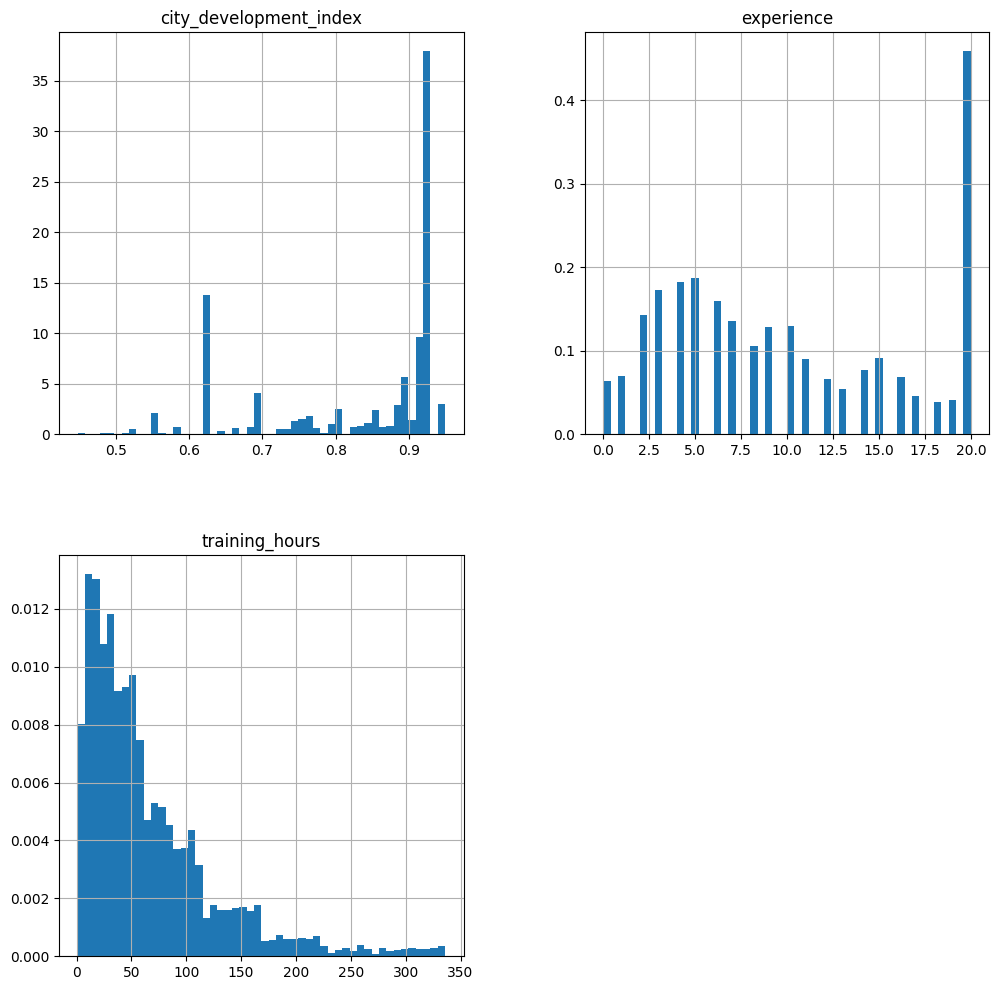

In [12]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

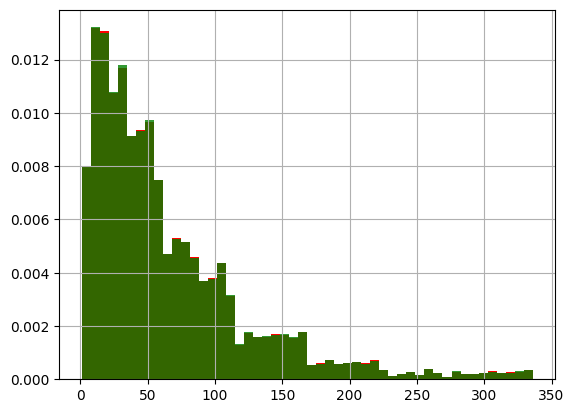

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

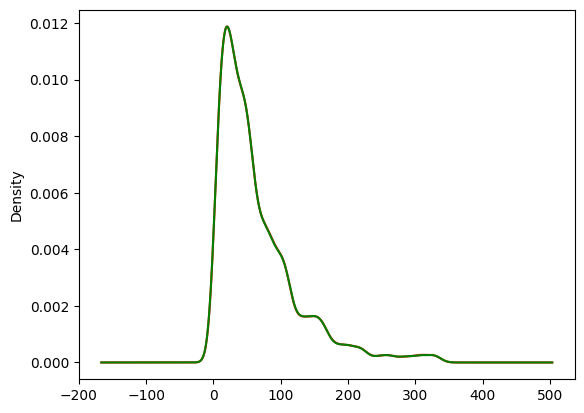

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

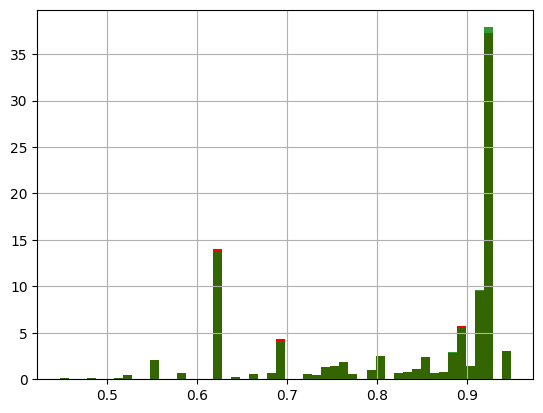

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

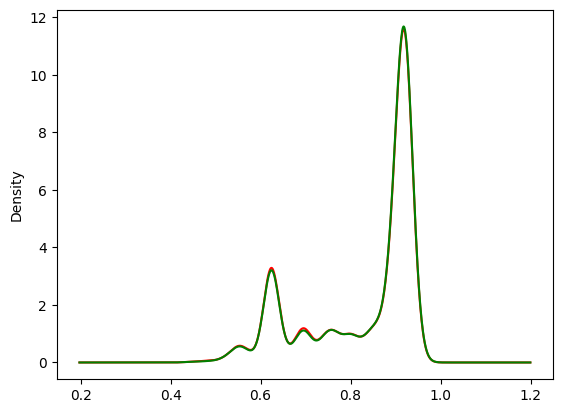

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

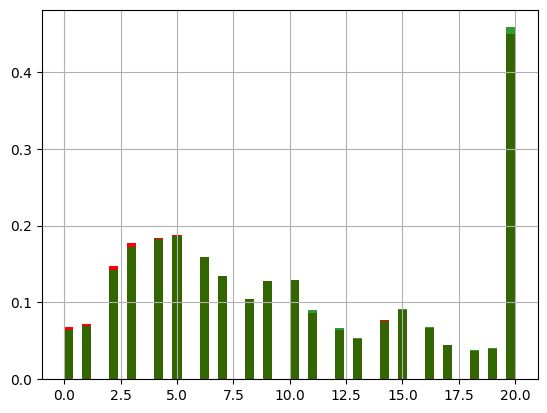

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

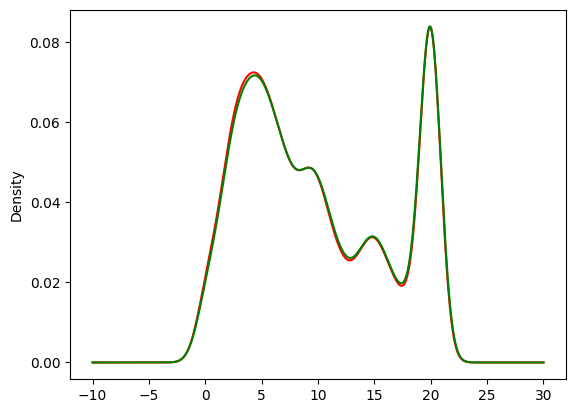

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [19]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [20]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [21]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
